# Ortogonalização e o *Double Machine Learning* (DML)

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Ortogonalização
  * O Procedimento Básico de Ortogonalização
  * Teorema Frisch – Waugh – Lovell (FWL)
  * Aplicação da Ortogonalização no Python
* DML - Orthogonal/Double Machine Learning
  * Intuição do DML
    * Partially Linear Regression Models (PLR)
    * Partially Linear IV Regression Models (PLIV)
    * Interactive regression models (IRM)
    * Interactive IV regression models (IIVM)
  * Formalização do DML e a Função de Influência (Orthogonal Score)
* Aplicação do DML em Python
  * Partially Linear Regression Models* (PLR) - EconML - LinearDML
    * ATE
    * CATE
    * CATE para características específicas
  * Relaxando as hipóteses de linearidade na prática
    * Não linearidade da covariável X: CATE(X)
    * Não linearidade do Tratamento: dose-response CATE(X)
    * Não linearidade da covariável X: CATE(X) para tratamento contínuo
* Outros modelos de DML
  * Causal Forest DML
  * Othogonal Forest DML
* Considerações Finais

## Referências

**Principais:**
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, Volume 21, Issue 1, 1 February 2018, Pages C1–C68, https://doi.org/10.1111/ectj.12097
* Chernozhukov
* Microsoft EconML: https://econml.azurewebsites.net/
* UBER CausalML: https://causalml.readthedocs.io/en/latest/
* DoubleML for python: https://github.com/DoubleML/doubleml-for-py ou https://docs.doubleml.org/stable/index.html

**Complementares:**
* Chernozhukov, V. and C. Hansen (2004). The effects of 401 (k) participation on the wealth distribution: an instrumental quantile regression analysis. Review of Economics and Statistics 86, 735–51. 
* Chernozhukov, V., D. Chetverikov and K. Kato (2014). Gaussian approximation of suprema of empirical processes. Annals of Statistics 42, 1564–97. 
* Chernozhukov, V., J. Escanciano, H. Ichimura, W. Newey and J. Robins (2016). Locally robust semiparametric estimation. Preprint (arXiv:1608.00033). 
* Chernozhukov, V., C. Hansen and M. Spindler (2015a). Post-selection and post-regularization inference in linear models with very many controls and instruments. Americal Economic Review: Papers and Proceedings 105, 486–90. 
* Chernozhukov, V., C. Hansen and M. Spindler (2015b). Valid post-selection and post-regularization inference: an elementary, general approach. Annual Review of Economics 7, 649–88.
* Bach, P., Chernozhukov, V., Kurz, M. S., and Spindler, M. (2022), DoubleML - An Object-Oriented Implementation of Double Machine Learning in Python, Journal of Machine Learning Research, 23(53): 1-6, https://www.jmlr.org/papers/v23/21-0862.html.
* Bach, P., Chernozhukov, V., Kurz, M. S., Spindler, M. and Klaassen, S. (2024), DoubleML - An Object-Oriented Implementation of Double Machine Learning in R, Journal of Statistical Software, 108(3): 1-56, doi:10.18637/jss.v108.i03, arXiv:2103.09603.
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68, doi:10.1111/ectj.12097.
* Lang, M., Binder, M., Richter, J., Schratz, P., Pfisterer, F., Coors, S., Au, Q., Casalicchio, G., Kotthoff, L. and Bischl, B. (2019), mlr3: A modern object-oriented machine learing framework in R. Journal of Open Source Software, doi:10.21105/joss.01903.
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011), Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12: 2825–2830, https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.


**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

### Ortogonalização

A ideia de ortogonalização aparece tanto em regressão linear quanto em métodos modernos de inferência causal baseados em Machine Learning. No entanto, esses dois usos têm significados diferentes. Nesta seção, começamos com a versão **linear clássica**, associada ao Teorema de Frisch–Waugh–Lovell (FWL), e depois conectamos com a noção mais geral de **Neyman orthogonality**, utilizada no Double Machine Learning.


#### O Procedimento Clássico de Ortogonalização (FWL)

O teorema de Frisch, Waugh e Lovell (1933) mostra que é possível decompor qualquer regressão linear multivariada em três estágios, preservando exatamente os coeficientes da regressão completa.

Suponha que o vetor de covariáveis $X$ seja particionado em duas partes:

* $X_{1}$: covariáveis de controle
* $D$: variável cujo efeito queremos isolar


***Primeira Etapa: Residualizar $Y$ em relação a $X_{1}$***

Estimamos:

$$
y_i = \theta_0 + \theta_1 X_{1i} + \varepsilon_i
$$

e guardamos os resíduos:

$$
y_i^{*} = y_i - (\hat\theta_0 + \hat\theta_1 X_{1i}).
$$


***Segunda Etapa: Residualizar $D$ em relação a $X_{1}$***

Agora estimamos:

$$
D_i = \gamma_0 + \gamma_1 X_{1i} + e_i
$$

e guardamos os resíduos:

$$
D_i^{*} = D_i - (\hat\gamma_0 + \hat\gamma_1 X_{1i}).
$$

***Terceira Etapa: Regressão com as variáveis residualizadas***

Por fim, estimamos:

$$
y_i^{*} = \alpha_0 + \beta_2 D_i^{*} + u_i.
$$

O coeficiente $\hat\beta_{2}$ ou $\hat{\beta}_{2}^{FWL}$ é exatamente o mesmo que obteríamos na regressão original contendo todas as variáveis.


### Teorema Frisch–Waugh–Lovell (FWL)

O teorema afirma que:

$$
\hat{\beta}_{2}^{FWL} = \hat{\beta}_{2}^{\text{regressão completa}} 
$$

onde a regressão completa é:

$$
y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 D_i + e_i.
$$

Ou seja, **podemos estimar o efeito de $D$ sobre $Y$ “limpando” ambos das influências de $X_{1}$**.



**Intuição do FWL**

A regressão linear pode ser vista como um conjunto de projeções ortogonais em espaços vetoriais. O teorema FWL diz que:

* primeiro “limpamos” $D$ retirando a parte explicada por $X_1$;
* depois “limpamos” $Y$ retirando a parte explicada por $X_1$;
* por fim, relacionamos apenas os componentes de $Y$ e $D$ que são **ortogonais** (isto é, não explicados por $X_1$).

O procedimento remove a correlação entre $X_1$ e $D$, e entre $X_1$ e $Y$, isolando o efeito de $D$ sobre $Y$. Assim:

* os dois primeiros estágios filtram os confundidores ($X_1$),
* o terceiro estágio estima o impacto causal de interesse, ($\beta_2$).

Esta é a versão **linear** e **exata** da ortogonalização.

### Aplicação da Ortogonalização no Python

Vamos aplicar o procedimento de ortogonalização considerando um modelo de regressão linear simples. Vamos realizar a orgonalização supondo linearidade entre as variáveis para entender o conceito. Posteriormente, vamos aplicar o procedimento de ortogonalização em um modelo de machine learning. 

Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", message="\'force_all_finite\' was renamed to \'ensure_all_finite\'")

O próximo bloco de código carrega o dataset utilizado nos exemplos a seguir. Caso não abra por erro "ConnectionResetError", clique novamente para rodar, até que carregue com sucesso.

In [2]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

Filtragem das variáveis

In [3]:
# Criar a variável de resultado
df['Y'] = df['bweight']

# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)

# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)

Para desviar este conjunto de dados, precisaremos de dois modelos. O primeiro modelo, vamos chamá-lo $M_{D}(X)$, prevê o tratamento (Se a gestante é fumante, no nosso caso) utilizando os confundidores. É um dos estágios que vimos acima, no teorema de Frisch–Waugh–Lovell.

Assim que tivermos este modelo, construiremos os resíduos

$$ D_{i}^{*} = D_{i} - M_{D}(X_{i})$$

In [4]:
m_D = smf.ols("D ~ 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['D_star'] = df['D'] - m_D.predict(df)

Você pode pensar neste resíduo como uma versão do tratamento que é imparcial ou, melhor ainda, que é impossível de prever a partir dos fatores de confusão $X$. Como os fatores de confusão já eram usados ​​para prever $D$, o resíduo é, por definição, imprevisível com com $X$. Outra maneira de dizer isso é que o viés foi explicado pelo modelo $M_{D}(X)$, produzindo $D_{i}^{*}$ que é tão bom quanto atribuído aleatoriamente. É claro que isso só funciona se tivermos em $X$ todos os fatores de confusão que causam ambos $D$ e $Y$.

Também podemos construir resíduos para o resultado.

$$ y_{i}^{*} = y_{i} - M_{y}(X_{i})$$


Este é outro estágio do teorema de Frisch – Waugh – Lovell. Isso não torna o conjunto menos tendencioso, mas facilita a estimativa do efeito, reduzindo a variância em $y$. Mais uma vez você pode pensar $y_{i}^{*}$ como uma versão de $y_{i}$ imprevisível de $X$ ou que teve todas as suas variações devido a $X$ explicadas. Pense nisso. Nós já usamos $X$ para prever $y$ com $M_{y}(X_{i})$. E $y_{i}^{*}$ é o erro dessa previsão. Então, por definição, não é possível prever isso a partir de $X$. Todas as informações em $X$ para prever $y$ já foram usadas. Se for esse o caso, a única coisa que resta para explicar $y_{i}^{*}$ é algo que não usamos usamos para construí-lo (não incluído em $X$), que é apenas o tratamento (novamente, assumindo que não há fatores de confusão não medidos).


In [5]:
m_y = smf.ols("Y ~  1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['y_star'] = df['Y'] - m_y.predict(df)

Por fim, aplicando o teorema para o segundo estágio,

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


In [6]:
FWL1 = smf.ols("y_star ~ D_star", data=df).fit()
print(FWL1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           1.91e-23
Time:                        16:47:08   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.172e+04
Df Residuals:                    4640   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.586e-11      8.041   1.97e-12      1.0

Podemos comparar o resultado com o OLS tradicional que considera diretamente todas as covariáveis:

In [7]:
ols = smf.ols("Y ~ D + 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     38.49
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          5.80e-100
Time:                        16:47:11   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.175e+04
Df Residuals:                    4627   BIC:                         7.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2851.5203     54.983     51.861      0.0

Realmente o teorema de Frisch-Waugh-Lovell funciona mesmo!

Podemos concluir que depois de fazermos as duas transformações, a única coisa que resta para prever esses resíduos é o tratamento. 

### De FWL para Ortogonalização Moderna (Neyman Orthogonality)

Embora o FWL forneça um exemplo fundamental de ortogonalização linear, os métodos modernos de inferência causal — como o **Double Machine Learning** — utilizam uma noção mais geral chamada **Neyman orthogonality**, válida fora do contexto linear.

Consideremos o modelo parcialmente linear:

$$
y_i = \beta D_{i} +  g(X_{1i}) + \varepsilon_i
$$

e a equação estrutural para o tratamento:

$$
D_i = m(X_{1i}) + u_i,
$$

Quando usamos Machine Learning para estimar $g(X)$ e $m(X)$, essas estimativas tendem a ser enviesadas devido a regularização, suavização, poda e limitações inerentes dos algoritmos. Se aplicássemos somente a lógica linear do FWL, esse viés contaminaria o estimador causal final.

A ortogonalização moderna resolve esse problema construindo momentos que são insensíveis a pequenos erros em $g(X)$ e $m(X)$. Formalmente, um momento ortogonal satisfaz:

$$
\left.
\frac{\partial}{\partial r}
\mathbb{E}[\psi(W;\theta_0,\eta_0+r(\eta - \eta_0))]
\right|_{r=0}
= 0.
$$

Isso garante que:

* erros de regularização em $\hat g(X)$ e $\hat m(X)$ **não afetam o estimador causal na primeira ordem**,
  * o erro de estimação decai na velocidade $(o_p(n^{-1/4}))^{2} = o_p(n^{-1/2})$, que é a melhor taxa possível para estimadores baseados em dados iid.
* a etapa final continua válida mesmo que as regressões auxiliares não sejam estimadas perfeitamente,
* e a inferência permanece assintoticamente normal.

Assim:

* o teorema FWL é uma forma linear de residualização;
* a ortogonalidade de Neyman é uma generalização semiparamétrica, indispensável para permitir o uso de Machine Learning sem comprometer o estimador causal.

##  DML - Orthogonal/Double Machine Learning

### Intuição do DML


Vimos que o teorema de Frisch-Waugh-Lovell nos permite estimar o efeito causal de um tratamento $D$ sobre um resultado $Y$ enquanto controlamos por um conjunto de covariáveis $X$ para uma abordagem linear nos dois estágios.

No entanto, a abordagem linear pode ser muito restritiva. Em muitos casos, as relações entre as variáveis podem ser não lineares ou de alta dimensão. Nesses contexto, podemos usar **algoritmos de aprendizado de máquina** para **controlar essas relações não lineares de alta dimensão**. 

Então podemos aplicar o "Double Machine Learning - DML" (Double/Debiased Machine Learning - DDML). Onde utilizamos ortogonalização com modelos de aprendizado de máquina para isolar o ATE ou CATE. 

O artigo que fundamenta Double Machine Learning (Neyman Orthogonality) é de **Chernozhukov et al (2018)** :

<div style="text-align:center;">
    <img src="images\Chernozhucov.png"  alt="Imagem" style="width: 700px;"/>
</div>


Basicamente temos 4 abordagens:


* Partially Linear Regression Models (PLR)
* Partially Linear IV Regression Models (PLIV)
* Interactive regression models (IRM)
* Interactive IV regression models (IIVM)


### *Partially Linear Regression Models* (PLR)

O modelo parcialmente linear de Chernozhukov et al. (2018) é:

$$
Y = \theta_0 D + g(X) + \varepsilon,
\qquad E[\varepsilon \mid D,X] = 0,
$$

$$
D = m(X) + \eta,
\qquad E[\eta \mid X] = 0.
$$

Neste modelo, **o efeito causal do tratamento é constante** $\theta_0$.
O termo $g(X)$ captura toda a parte não linear da relação entre $X$ e $Y$, enquanto $m(X)$ captura a relação entre $X$ e $D$.

**Passo 1 — Estimação das funções auxiliares (nuisance)**

Usamos ML para estimar:

* $ \hat g(X) \approx E[Y|X] $
* $ \hat m(X) \approx E[D|X] $

e aplicamos **cross-fitting** para evitar overfitting. O cross-fitting divide a amostra em K folds e evita que o mesmo overfitting que reduz viés nos modelos auxiliares se transmita ao estimador causal. Ele garante que a ortogonalidade seja válida na prática.

**Passo 2 — Residualização (partialling out)**

Construímos os resíduos:

$$
Y^{*} = Y - \hat g(X),
\qquad
D^{*} = D - \hat m(X).
$$

Por **Neyman orthogonality**, a regressão de $Y^*$ em $D^*$ remove o viés de regularização do ML, tornando o estimador robusto. Quando usamos ML para estimar $g(X)$ e $m(X)$, o erro de regularização tende a contaminar o estimador causal. A ortogonalidade garante que um pequeno erro nessas funções auxiliares produz apenas um erro de segunda ordem, e não de primeira ordem, no estimador final.


**Passo 3 — Estimação do efeito causal**

O segundo estágio é:

$$
Y^{*} = \theta_0 D^{*} + \text{erro}.
$$

O estimador DML é:

$$
\hat\theta_0 =
\frac{\sum (Y_i - \hat g(X_i))(D_i - \hat m(X_i))}
{\sum (D_i - \hat m(X_i))^2}.
$$

Este é o estimador “debiased” ou “orthogonal”.


**Extensão: estimar um CATE linearizado com DML**

Embora o PLR original estime apenas o ATE, podemos estender:

$$
\theta(X) = X'\beta + \theta_{\text{intercept}}.
$$

Isso cria uma **aproximação linear do CATE**, útil para interpretação e aplicações onde queremos entender *como* o efeito varia com as covariáveis.

A estimação segue os mesmos passos (residualização + regressão residual), mas agora a regressão final é:

$$
Y^{*} = (X'\beta + \theta_{\text{intercept}}) D^{*} + \text{erro}.
$$

Interpretamos:

* $\beta$ = como cada covariável altera o efeito do tratamento;
* $\theta_{\text{intercept}}$ = efeito médio base.


Por fim, CATE Paramétrico via DML, quando queremos aprender uma função heterogênea do tipo:

$$
\theta(X) = X'\beta
$$

o segundo estágio deixa de ser uma regressão simples e torna-se um problema de otimização regularizado:

$$
\theta = argmin_{\theta} E[(Y^{*} - \theta (X) D^{*})^{2}] + \lambda R(\theta)
$$

* $R(\theta)$ é um termo de regularização (L1, L2, Elastic Net).
* A regularização controla overfitting e permite estimar CATEs esparsos.
* O DML garante que erros na estimação de $g(X)$ e $m(X)$ não contaminem $\hat{\theta}$ (score ortogonal).

O termo de regularização ajuda a evitar overfitting e é especialmente útil em modelos de alta dimensão, onde $\theta$ pode ser esparso (muitos coeficientes iguais a zero, em outras palavras, apenas algumas variáveis ou características têm influência significativa, enquanto o restante pode ser ignorado sem perda relevante de informação).




### *Partially Linear IV Regression Models (PLIV)*

No PLIV, o tratamento $D$ é **endógeno**, de forma que:

$$
E[\epsilon \mid D, X] \neq 0.
$$

O modelo estrutural é:

$$
Y = \theta_0 D + g(X) + \varepsilon,
$$

e a equação de primeira etapa é:

$$
D = m(X, Z) + \eta,
$$

onde **$Z$ é um instrumento válido**, satisfazendo:

1. **relevância**: $E[D\mid X,Z]$ varia com $Z$;
2. **exogeneidade**: $E[\varepsilon\mid X,Z] = 0$;
3. **exclusão**: $Z$ afeta $Y$ apenas por meio de $D$.

Onde $Z^{*} = Z - \hat h(X)$ é o instrumento residualizado (Via ML). O PLIV é uma **generalização ortogonalizada e robusta do 2SLS**:

* Em vez de estimar relações lineares, estimamos:

  * $g(X)$ (como um controle flexível via ML),
  * $m(X,Z)$ (relação entre o tratamento e o instrumento),
  * $h(X)$ (relação entre o instrumento e as covariáveis),
* E aplicamos uma condição de momentos ortogonal para identificar $\theta_0$.

A equação de escore é:

$$
E\left[(Y - \hat g(X) - \theta(D - \hat m(X,Z)))(Z - \hat h(X))\right]=0,
$$

ou seja, 

$$
E\left[(Y^{*} - \theta(D^{*}))(Z^{*})\right]=0,
$$


que é análoga ao 2SLS, mas **com ML, cross-fitting e ortogonalização**.





### *Interactive Regression Models (IRM)*

*Conhecido como R-Learner quando formulado como Nie & Wager, e como DRLearner quando implementado com duplo ajuste*. O IRM permite que **o efeito do tratamento varie com as covariáveis**, sem a restrição de que o efeito seja linear.

Modelo geral:

$$
Y = g(D, X) + U,
$$

$$
D = m(X) + V.
$$

* Não há imposição de separabilidade $g(D,X)=\theta D + g(X)$.
* O efeito é completamente não paramétrico:

$$
\tau(X) = g(1,X) - g(0,X).
$$

**Procedimento típico**

1. Estimar $m(X)=E[D|X]$.
2. Estimar as funções contrafactuais:
   $$
   \mu_0(X) = E[Y|X,D=0], \quad
   \mu_1(X) = E[Y|X,D=1].
   $$
3. Usar o **score ortogonal** (R-learner):


$$
\hat \tau = \arg\min_\tau ;
\frac{1}{n} \sum_{i=1}^n
\left[(Y_i - \hat g(D_i,X_i)) - \tau(X_i)(D_i - \hat m(X_i))\right]^2.
$$


que é minimizado via ML.

O resultado é um estimador **não paramétrico, heterogêneo e duplamente robusto**.

No EconML:
* Não existe uma classe chamada *IRM*,
* Mas o **DRLearner** implementa a versão ortogonal do IRM/R-Learner: `from econml.dr import DRLearner`


### *Interactive IV Regression Models (IIVM)*

*modelo totalmente não linear com IV e heterogeneidade – CLATE*. Este modelo trata do caso em que:

* $D$ é endógeno
* $Z$ é instrumento binário
* Há heterogeneidade do efeito.

A estrutura é mais rica:

$$
Y = g(D, X) + U,
$$

$$
D = m(X, Z) + V,
$$

$$
Z = h(X) + E.
$$

O foco não é o ATE, mas sim o **CLATE**:

$$
\tau_{CLATE}(X) = E[Y(1) - Y(0) \mid \text{compliers}, X].
$$

Suposições necessárias:

* **Independência condicional**: $Z \perp (Y(0),Y(1),D(0),D(1)) \mid X$.
* **Monotonicidade**: $D(1) \ge D(0)$.
* **Exclusão**.
* **Relevância**.

**Estimação via DML**

* $E[D|X,Z=0]$, $E[D|X,Z=1]$
* $E[Y|X,Z=0]$, $E[Y|X,Z=1]$
* $E[Z|X]$

E resolvemos uma equação de escore do tipo:

$$
E\left[\psi(Y,D,Z,X;\theta)\right]=0,
$$

onde $\psi$ é ortogonal e corresponde à versão IV não linear do tratamento. `from econml.iv.nnet import IIVM`


* Instrumento binário
* Tratamento binário
* Efeitos totalmente não lineares e heterogêneos
* Alvo = LATE ou CLATE

---

## Formalização do DML e a Função de Influência (Orthogonal Score)

**Efficient Influence Function (EIF) e o Fundamento Unificador dos Estimadores Modernos**

Nos estimadores modernos de inferência causal — AIPW, TMLE, Double Machine Learning (DML),PLR, PLIV, IRM e IIVM, Causal Forest, etc  — o objeto matemático fundamental é a **Efficient Influence Function (EIF)**.

Ela é o elemento que:

1. define o **estimador semiparametricamente eficiente**,
2. garante **robustez a erros de ML** (*Neyman orthogonality*),
3. permite inferência assintótica simples via CLT,
4. e unifica todos os estimadores modernos sob uma mesma estrutura formal.


**Parâmetro causal como funcional**

Denote:

* $W = (Y, D, X)$ o vetor de dados.
* $P$ a distribuição desconhecida dos dados.
* $\psi(P)$ o **parâmetro causal** que queremos estimar.
  * Exemplos: ATE, ATT, LATE, CATE, CLATE etc.

Chamamos esse objeto de **funcional**, porque ele é uma função definida em um espaço de distribuições:

$$
\psi: \mathcal{P} \to \mathbb{R}.
$$


**Influence Function (IF)**

A **influence function** ($\phi$) é definida como a **derivada funcional** de $\psi(P)$ em direção a uma perturbação pontual:

$$
\phi(W; P) = 
\left.\frac{d}{d\varepsilon}
\psi(P_\varepsilon)\right|_{\varepsilon=0}
$$

onde:

$$
P_\varepsilon = (1 - \varepsilon)P + \varepsilon \delta_W
$$

o termo $\delta_W$ adiciona massa no ponto $W$; $\epsilon$ controla o tamanho infinitesimal da perturbação. Ou seja, $\phi(W)$ mede a **sensibilidade infinitesimal** do estimador quando uma única observação é adicionada com peso infinitesimal.

estamos definindo uma perturbação **em torno da distribuição P**, colocando peso infinitesimal **em um ponto específico W**. Não significa que $W$ seja um ponto aleatório da amostra. Na definição, $W$ é um ponto arbitrário do suporte, não uma observação aleatória real.

Embora a IF seja definida como um objeto funcional ($\phi(w)$ para cada ponto $w$ do suporte), quando trabalhamos com dados amostrais tratamos $W_{i} \sim P$, e portanto $\phi(W_i)$ torna-se uma variável aleatória. É por isso que podemos falar de esperança, variância e CLT aplicados à IF.


**Propriedades**:

1. **Esperança zero:**
   $$
   E[\phi(W;P)] = 0.
   $$

A esperança zero significa:“No ponto verdadeiro, se você não perturbar a distribuição, o parâmetro não muda". A influence function mede variação.
Se não há variação, a média deve ser zero.

Essa parte gera confusão, mas é simples quando se lembra que:
* A IF é definida para uma perturbação pontual,
* Mas a estimativa empírica é feita com n observações
* pelo teorema do delta funcional, a média aparece porque a estimativa empírica da distribuição é uma média de deltas de Dirac.
  * E como a IF atua como derivada, a expansão do Delta Funcional gera uma média das IFs em cada observação real.

Então, A IF mede a sensibilidade do estimador a uma única observação.
* Em uma amostra com $n$ observações, cada observação contribui $1/n$ para a estimativa da distribuição.
* Logo, o efeito total da amostra é uma média dos efeitos individuais.

2. **Linearização:**
   $$
   \hat\psi - \psi_0
   =
   \frac{1}{n}\sum_{i=1}^n \phi(W_i) + o_p(n^{-1/2}).
   $$

onde:
* $\hat\psi$ = estimador do parâmetro causal,
* $\psi_0 = \psi(P)$ = valor verdadeiro do parâmetro causal.
* $o_p(n^{-1/2})$ = termo de ordem menor que $n^{-1/2}$ em probabilidade.

Repare que temos a versão assintótica do efeito acumulado de $n$ pequenas perturbações, cada uma com peso $1/n$. Então, isso significa que o estimador pode ser aproximado pela média amostral da IF mais um termo de ordem menor que converge para zero mais rápido que $n^{-1/2}$.

A média aparece porque a estimativa empírica da distribuição é uma média de deltas de Dirac. 

**Efficient Influence Function (EIF)**

A **EIF** é a **IF com variância mínima** dentro do espaço tangente do modelo semiparamétrico.

Ela define o menor limite de variância possível:

$$
Var(\phi_{\text{eff}}(W)) = \text{Semiparametric Efficiency Bound}.
$$

E qualquer estimador que satisfaça:

$$
\hat\psi =
\psi_0
+
\frac{1}{n}\sum_{i=1}^n \phi_{\text{eff}}(W_i) + o_p(n^{-1/2})
$$

* **eficiente**,
* **assintoticamente normal**,
* **deviance-free**,
* e possui inferência simples.


**Exemplo central: EIF do ATE**

Para tratamento binário $D\in{0,1}$:

* $m(d,X) = E[Y|D=d,X]$ (outcome regression)
* $p(X) = P(D=1|X)$ (propensity score)
* $\psi_0 = E[m(1,X)-m(0,X)]$ (ATE)

A **EIF do ATE** é:

$$
\phi(W;\eta) =
\left[
\frac{D}{p(X)} - \frac{1-D}{1-p(X)}
\right]
(Y - m(D,X))
+
[m(1,X)-m(0,X)]
-
\psi_0.
$$

Aqui:

* **$\phi$** = influence function (minúsculo)
* **$\psi$** = parâmetro : ATE
* **$\eta$** = vetor de *nuisance functions* = $(m,p)$


***Interpretação dos termos:***

1. **Peso de correção do tratamento**
   $$
   \frac{D}{p(X)} - \frac{1-D}{1-p(X)}
   $$
   corrige desequilíbrio de propensão.

2. **Termo de erro residual**
   $$
   Y - m(D,X)
   $$
   corrige erros da outcome regression.

3. **Termo de regressão**
   $$
   m(1,X)-m(0,X)
   $$
   é a diferença contrafactual predita.

4. **$-\psi$** garante média zero.


**Ortogonalidade (Neyman Orthogonality)**

A EIF satisfaz:

$$
\frac{\partial}{\partial \eta} E[\phi(W;\eta)]\big|_{\eta=\eta_0} = 0.
$$

Ou seja:

> Pequenos erros nas regressões auxiliares não afetam o parâmetro principal em primeira ordem.

A primeira derivada da função escore em relação às funções auxiliares é zero no ponto verdadeiro. Se a derivada é zero, a variação do escore quando $\eta$ é estimado erroneamente não produz impacto linear — só quadrático.

Não afetar $\psi$ em primeira ordem significa que erros nas funções auxiliares estimadas por ML afetam o estimador apenas em segunda ordem — o impacto é quadrático, não linear — garantindo que mesmo ML inconsistente ou lento não cause viés assintoticamente relevante no estimador causal.

Isso é o fundamento de:

* Double robustness (DR)
* Targeted Maximum Likelihood (TMLE)
* Double Machine Learning (DML)



---

## Aplicação do DML em Python

### *Partially Linear Regression Models* (PLR) - EconML - LinearDML

Vamos rodar o modelo *Partially Linear Regression Models* (PLR), `LinearDML`, com estimador de *Machine Learning*: "Gradient Boosting". Com o pacote EconML da Microsoft para aplicar o DML. 

#### ATE

Carregando os pacotes para esta análise (lembre que já estamos utilizano o dataframe carregado anteriormente).

In [9]:
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [10]:
# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

In [9]:
# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

In [11]:
# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


Aqui temos o efeito médio do tratamento (ATE) estimado. 

#### CATE

Agora, vamos calcular o efeito heterogêneo do tratamento (CATE) para cada característica. Lembre que estamos consdiderando o modelo que supõe que o CATE é linear nas covariáveis (LinearDML). Os resultados já estão disponíveis no objeto "estimator" realizado pelo pacote EconML.


In [12]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

**Interpretação:**

* mage (idade da mãe):
  * point_estimate: -11.333 (p-value: 0.031)
  * Isso sugere que, para cada aumento de um ano na idade da mãe, o efeito negativo de fumar durante a gravidez no peso ao nascer diminui em 11.047 gramas (ou seja, o efeito se torna mais negativo).
  * Há evidência estatística de que a idade da mãe influencia o efeito de fumar durante a gravidez sobre o peso ao nascer.

* medu (educação materna):
  * point_estimate: 17.987 (p-value: 0.133)
  * Então, não há evidência estatística de que a educação materna mitigue o efeito negativo. A direção sugerida é positiva (maior educação → efeito menos negativo), mas sem significância.

* foreign (se a mãe é estrangeira):
  * point_estimate: 348.68 (p-value: 0.023 )
  * Sugere que mães estrangeiras apresentam um efeito tratamento condicional ~349 g maior do que mães não estrangeiras.
  * Interpretação: a nacionalidade estrangeira está associada a um efeito menos negativo do fumo.

* Outras variáveis: Algumas covariáveis não são estatisticamente significativas (pvalue > 0.05), indicando que não há evidência suficiente para afirmar que essas covariáveis influenciam o efeito do tratamento.

* CATE Intercept Results (Resultados do Intercepto do CATE):
  * cate_intercept = 57.711, p-valor = 0.728 (não significativo)
  * Esse é apenas o “baseline” quando todas as variáveis estão em zero — dificilmente tem interpretação substantiva.

O modelo sugere que mães mais velhas sofrem um impacto mais negativo do fumo no peso ao nascer, enquanto mães estrangeiras apresentam um impacto menos negativo. Para outras covariáveis, não há evidência robusta de heterogeneidade.

**Resumo:**

* O efeito do fumo não é constante; ele varia com características maternas.
* Idade materna (mage): significativa, aumenta a gravidade do efeito negativo.
* Educação materna (medu): direção sugere mitigação, mas não é estatisticamente significativa.
* Mãe estrangeira (foreign): significativa, associada a um efeito menos negativo.
* Demais covariáveis: não significativas.
* Intercepto: não interpretável isoladamente.

#### CATE - Definição das Características Específicas

Certo, vimos o CATE de forma geral. E se quisermos especificar um tipo de indivíduo? Que tenha características que possamos definir?

Então, para calcular o efeito tratamento condicional ($\theta(X)$) para um conjunto específico de covariáveis $X$, em:

$$ \hat{\theta}(X) = X'\hat{\beta} + \hat{\theta}_{\text{intercept}}$$

Por exemplo, suponha que você queira calcular o efeito para uma gestante que seja apenas casada, e que as demais variáveis sejam mantidas no valor médio da amostra.

***CATE nos valores médios***

In [13]:
# calcula a média das covariáveis
x_mean = X.mean().to_dict()

# cria uma linha com os valores médios
x_point = pd.DataFrame([x_mean])

In [14]:
x_point

,casada,mage,medu,fhisp,mhisp,foreign,alcohol,deadkids,nprenatal,mrace,frace,fage,fedu
0,0.699698,26.504524,12.689573,0.037053,0.034037,0.053425,0.032314,0.259371,10.758078,0.840586,0.813658,27.267126,12.307195


Vamos verificar o efeito para as mulheres que apresentam as características médias

In [15]:
res_cate_medias = estimator.ate_inference(X=x_point)
print(res_cate_medias.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0        -210.026        -210.026
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      26.169       -261.315       -158.736
------------------------------------------


Repare que é o mesmo valor do ATE, entretanto como fixamos os valores na média, não temos mais a variação entre os indivíduos.

***CATE para casadas e demais valores médios***

Agora, queremos estudar ***apenas o caso da gestante ser casada***, e vamos manter as demais variáveis no valor médio da amostra.

In [16]:
# calcula a média das covariáveis
x_mean = X.mean().to_dict()

# cria uma linha com os valores médios
x_point = pd.DataFrame([x_mean])

# substitui a coluna (valor) da variável casada pelas condição de interesse
x_point['casada'] = 1

In [17]:
res_cate_casadas = estimator.ate_inference(X=x_point)
print(res_cate_casadas.summary())

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
  -201.369      33.786 -5.96    0.0      -267.588      -135.149
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0        -201.369        -201.369
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      33.786       -267.588       -135.149
------------------------------------------


O valor reduziu em termos de magnitude. Ou seja, ser casada está associado a um efeito menos negativo do fumo no peso ao nascer.

***CATE para casadas, não-estrangeiras com 12 anos de educação***

Vamos buscar uma análise ainda mais heterogênea. Gestantes casadas, não-estrangeiras e com 12 anos de educação.

Vamos seguir o mesmo procedimento anterior, ou seja, criar outra variável contendo as características para estimar o CATE:

In [18]:
# substitui pelas variáveis de interesse
x_point['casada'] = 1
x_point['medu'] = 12
x_point['foreign'] = 0

In [19]:
res_sub = estimator.ate_inference(X=x_point)
print(res_sub.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -232.4      33.701 -6.896    0.0      -298.453      -166.347
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0          -232.4          -232.4
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      33.701       -298.453       -166.347
------------------------------------------


Para o perfil de gestante especificada, fumar durante a gravidez está associado a uma redução média de aproximadamente 232,4 gramas no peso ao nascer do bebê. Logo, há evidência estatística significativa de que fumar durante a gravidez está associado a uma redução substancial no peso ao nascer do bebê.

#### Gráfico do CATE para os níveis de escolaridade (medu)

Vamos supor que queremos observar como o efeito heterogêneo ocorre para diferentes níveis da variável de heterogeneidade. No caso, os diferentes níveis educacionais.

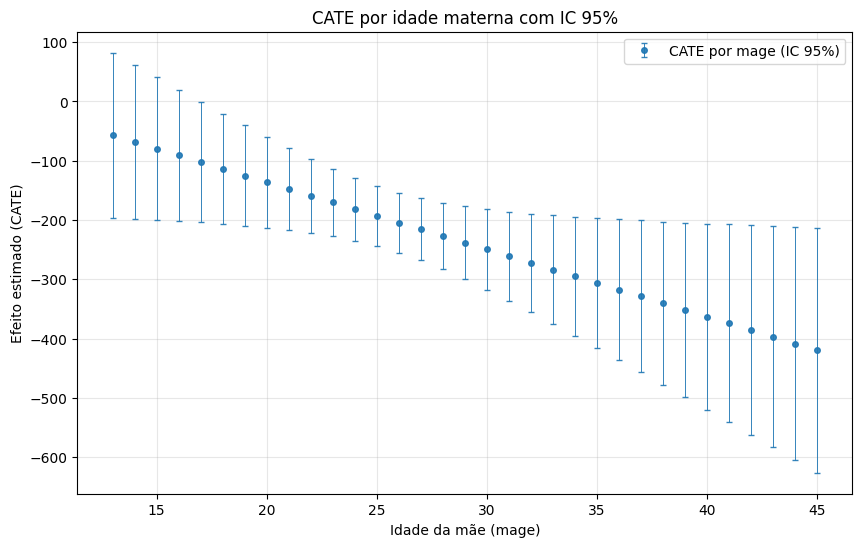

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obter valores únicos de 'mage' e suas contagens
mage_levels = np.sort(df['mage'].dropna().unique())
mage_counts = df['mage'].value_counts().reindex(mage_levels, fill_value=0)

# Construir grade variando apenas 'mage', mantendo demais covariáveis fixas na média
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base] * len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

# Calcular CATE e intervalo de confiança
cate_vals = estimator.effect(X_grid)
ci_low, ci_high = estimator.effect_interval(X_grid, alpha=0.05)

# Organizar resultados
res = pd.DataFrame({
    'mage': mage_levels,
    'cate': cate_vals,
    'ci_low': ci_low,
    'ci_high': ci_high,
    'n_obs': mage_counts.values
}).sort_values('mage').reset_index(drop=True)

# Plotar CATE com barras de IC
plt.figure(figsize=(10, 6))
plt.errorbar(
    res['mage'], res['cate'],
    yerr=[res['cate'] - res['ci_low'], res['ci_high'] - res['cate']],
    fmt='o', capsize=2, elinewidth=0.7, markersize=4, alpha=0.9,
    label='CATE por mage (IC 95%)'
)
plt.xlabel('Idade da mãe (mage)')
plt.ylabel('Efeito estimado (CATE)')
plt.title('CATE por idade materna com IC 95%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Esse gráfico é linear, devido as hipóteses do modelo de DML.

### Relaxando as hipóteses de linearidade na prática

**Não linearidade da covariável X: CATE(X)**

Vamos relaxar as hipóteses do modelo e verificar como ocorre o CATE em um ambiente não linear.

Possibilidades/contexto:
1. Tratamento binário (Fuma ou não)
   * Queremos verificar o CATE(X) supondo **não linearidade em X** (idade da mãe)

***Featurizer: RBF apenas em 'mage'***

c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\econml\sklearn_extensions\linear_model.py:1815: UserWarning: Co-variance matrix is underdetermined. Inference will be invalid!
  warnings.warn("Co-variance matrix is underdetermined. Inference will be invalid!")


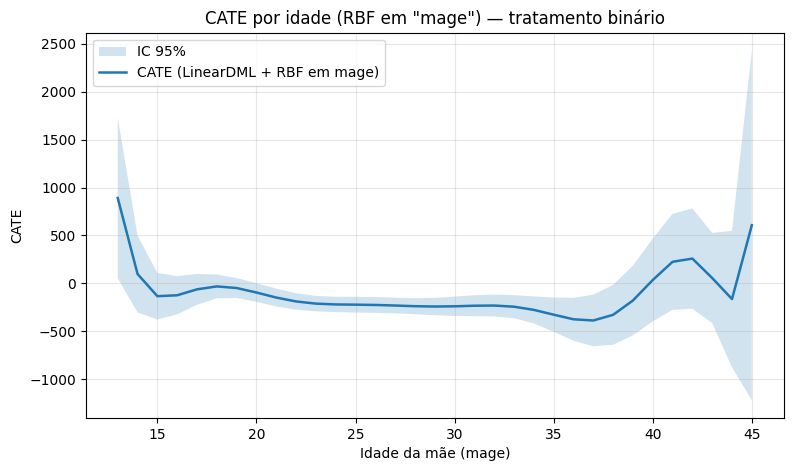

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from econml.dml import LinearDML

# --- Dados (exemplo) ---
# y: array (n,)
# D: array (n,) binário
# X: DataFrame com colunas ['casada','mage','medu', ...]
idx_mage = X.columns.get_loc('mage')

# --- Featurizer: RBF apenas em 'mage' ---
mage_rbf = Pipeline([
    ('sc', StandardScaler()),
    ('rbf', RBFSampler(gamma=0.08, n_components=30, random_state=123))
])
featurizer = ColumnTransformer(
    transformers=[('mage_rbf', mage_rbf, [idx_mage])],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# --- Estimador LinearDML ---
est_rbf = LinearDML(
    model_y=model_y,      # seus modelos já definidos
    model_t=model_d,      # p/ tratamento binário
    discrete_treatment=True,
    featurizer=featurizer,
    cv=5,
    random_state=123
)
est_rbf.fit(y, D, X=X)

# --- Efeito ao longo de 'mage' ---
mage_levels = np.sort(pd.to_numeric(df['mage'], errors='coerce').dropna().unique())
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base]*len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

cate = est_rbf.effect(X_grid)
lo, hi = est_rbf.effect_interval(X_grid, alpha=0.05)

plt.figure(figsize=(9,5))
plt.fill_between(mage_levels, lo, hi, alpha=0.2, label='IC 95%')
plt.plot(mage_levels, cate, lw=1.8, label='CATE (LinearDML + RBF em mage)')
plt.xlabel('Idade da mãe (mage)'); plt.ylabel('CATE')
plt.title('CATE por idade (RBF em "mage") — tratamento binário')
plt.grid(True, alpha=0.3); plt.legend(); plt.show()


***Splines***

uma forma de colocar à prova esses resultados é utilizar splines

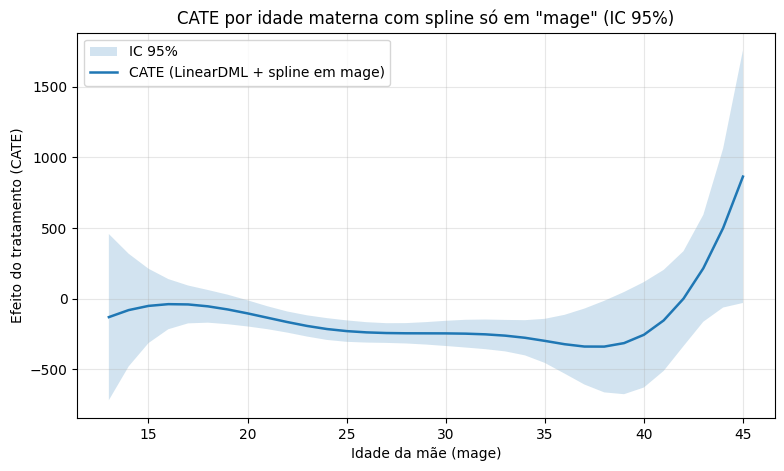

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import SplineTransformer
from econml.dml import LinearDML

# 1) índice da coluna 'mage' no DataFrame original X
idx_mage = X.columns.get_loc('mage')

# 2) featurizer: spline só em 'mage' (por índice); resto passa direto
featurizer = ColumnTransformer(
    transformers=[
        ('mage_spline', SplineTransformer(degree=3, n_knots=4, include_bias=False), [idx_mage])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# 3) estimador
est_spline = LinearDML(
    model_y=model_y,
    model_t=model_d,
    discrete_treatment=True,
    cv=10,
    featurizer=featurizer,
    random_state=123
)

est_spline.fit(y, D, X=X)

# 4) MESMA grade dos valores observados de 'mage' para comparação justa
mage_levels = np.sort(df['mage'].dropna().unique())

X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base]*len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

# 5) Efeito e IC 95%
cate = est_spline.effect(X_grid)
ci_low, ci_high = est_spline.effect_interval(X_grid, alpha=0.05)

# 6) Plot
plt.figure(figsize=(9,5))
plt.fill_between(mage_levels, ci_low, ci_high, alpha=0.2, label='IC 95%')
plt.plot(mage_levels, cate, lw=1.8, label='CATE (LinearDML + spline em mage)')
plt.xlabel('Idade da mãe (mage)'); plt.ylabel('Efeito do tratamento (CATE)')
plt.title('CATE por idade materna com spline só em "mage" (IC 95%)')
plt.grid(True, alpha=0.3); plt.legend(); plt.show()


Parece muito com a versão de ML. Então vou seguir com o RBF em todos os modelos.

**Não linearidade do Tratamento: dose-response CATE(X)**

Vamos verificar a curva de dose-resposta para o CATE(X), com X médias.

Contexto:
* Vamos criar um tratamento "contínuo".
* Vamos utilizar o featurizer no tratamento


In [23]:
# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1

# Conjunto de Covariáveis X
X = ['casada', 'mage', 'medu']

# garanta a ordem correta das categorias (se necessário)
order = ['0 daily', '1-5 daily', '6-10 daily', '11+ daily']
df['msmoke'] = pd.Categorical(df['msmoke'], categories=order, ordered=True)

# mapeamentos
map_mid = {
    '0 daily': 0,
    '1-5 daily': 3,
    '6-10 daily': 8,
    '11+ daily': 12  # ajuste se quiser um outro representativo (ex.: 15)
}
map_ord = {k: i for i, k in enumerate(order)}  # 0,1,2,3 (ordinal)

# variáveis de tratamento
df['T_cont'] = df['msmoke'].map(map_mid).astype(float) 

c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\econml\sklearn_extensions\linear_model.py:1815: UserWarning: Co-variance matrix is underdetermined. Inference will be invalid!
  warnings.warn("Co-variance matrix is underdetermined. Inference will be invalid!")


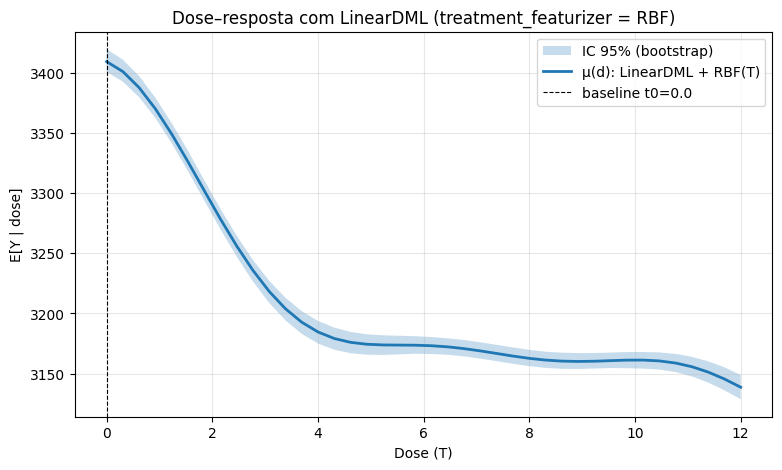

In [24]:
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import clone
from econml.dml import LinearDML

# ---------- dados ----------
df_ = df[['Y','T_cont','casada','mage','medu']].dropna().copy()
Y = df_['Y'].to_numpy(float)
T = df_['T_cont'].to_numpy(float).reshape(-1, 1)     # (n,1) !!!
Xdf = df_[['casada','mage','medu']]
Xs  = StandardScaler().fit_transform(Xdf.values)

# ---------- featurizer em T: RBF ----------
tfeat = RBFSampler(gamma=0.10, n_components=30, random_state=123)  # comece simples/estável

# ---------- modelos ----------
model_y = RandomForestRegressor(n_estimators=400, max_depth=8, random_state=123)
# para T|X use algo que aceite multioutput:
model_t = RandomForestRegressor(n_estimators=400, max_depth=8, random_state=123)
# (alternativa) model_t = MultiOutputRegressor(GradientBoostingRegressor(random_state=123))

# ---------- LinearDML com não linearidade em T ----------
est = LinearDML(
    model_y=model_y,
    model_t=model_t,
    discrete_treatment=False,
    treatment_featurizer=tfeat,   # φ(T) = RBF
    cv=5,
    random_state=123
)
est.fit(Y, T, X=Xdf.values)

# ---------- curva dose–resposta (nível) ----------
# modelo auxiliar de nível com o MESMO φ(T)
tfeat_aux = clone(tfeat).fit(T)
Phi_T = tfeat_aux.transform(T)
Z = np.hstack([Xs, Phi_T])
outcome_aux = clone(model_y).fit(Z, Y)

def Ey_at_t(Xs_block, t_scalar):
    m = Xs_block.shape[0]
    Phi = tfeat_aux.transform(np.full((m,1), t_scalar))
    return outcome_aux.predict(np.hstack([Xs_block, Phi]))

# grid + baseline
M = min(600, len(Xs))
rng = np.random.default_rng(123)
idx = rng.choice(len(Xs), size=M, replace=False)
Xs_sub, Xraw_sub = Xs[idx], Xdf.values[idx]

t_lo = float(np.percentile(T, 2))
t_hi = float(np.percentile(T, 98))
t_grid = np.linspace(t_lo, t_hi, 40).ravel()
t0 = float(np.percentile(T, 5))

y0_hat = Ey_at_t(Xs_sub, t0)

mu = []
for t1 in t_grid:
    T0 = np.full((M,1), t0)                 # 2D!
    T1 = np.full((M,1), t1)                 # 2D!
    eff = est.effect(Xraw_sub, T0=T0, T1=T1)
    mu.append((y0_hat + eff).mean())
mu = np.array(mu)

# bootstrap IC
B = 300
boot = np.empty((B, len(t_grid)))
for b in range(B):
    s = rng.integers(0, M, size=M)
    y0b = y0_hat[s]
    Xb  = Xraw_sub[s]
    for j, t1 in enumerate(t_grid):
        T0 = np.full((len(s),1), t0)
        T1 = np.full((len(s),1), t1)
        effb = est.effect(Xb, T0=T0, T1=T1)
        boot[b, j] = (y0b + effb).mean()

lo = np.percentile(boot, 2.5, axis=0)
hi = np.percentile(boot, 97.5, axis=0)

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.fill_between(t_grid, lo, hi, alpha=0.25, label='IC 95% (bootstrap)')
plt.plot(t_grid, mu, lw=2, label='μ(d): LinearDML + RBF(T)')
plt.axvline(t0, ls='--', lw=0.8, color='k', label=f'baseline t0={t0:.1f}')
plt.xlabel('Dose (T)'); plt.ylabel('E[Y | dose]')
plt.title('Dose–resposta com LinearDML (treatment_featurizer = RBF)')
plt.grid(True, alpha=0.3); plt.legend(); plt.show()


**Não linearidade da covariável X: CATE(X) para tratamento contínuo**

Contexto:
* Tratamento Contínuo
* featurizer na variável X específica, para analisar o CATE(X) com essa X variando de forna não linear (Efeito Heterogêneo).

c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\econml\sklearn_extensions\linear_model.py:1815: UserWarning: Co-variance matrix is underdetermined. Inference will be invalid!
  warnings.warn("Co-variance matrix is underdetermined. Inference will be invalid!")


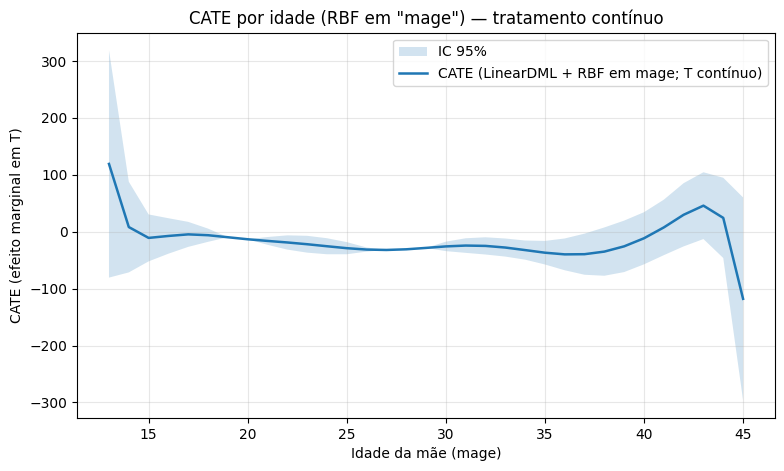

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from econml.dml import LinearDML

# --- Dados ---
# y: array (n,)
# T: array (n,1) contínuo
# X: DataFrame com colunas ['casada','mage','medu', ...]
idx_mage = X.columns.get_loc('mage')

# --- Featurizer: RBF apenas em 'mage' ---
mage_rbf = Pipeline([
    ('sc', StandardScaler()),
    ('rbf', RBFSampler(gamma=0.08, n_components=30, random_state=123))
])
featurizer = ColumnTransformer(
    transformers=[('mage_rbf', mage_rbf, [idx_mage])],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# --- Estimador LinearDML (tratamento contínuo) ---
est_rbf = LinearDML(
    model_y=model_y,
    model_t=model_t,          # modelo para T|X
    discrete_treatment=False, # T contínuo
    featurizer=featurizer,
    cv=5,
    random_state=123
)
est_rbf.fit(y, T, X=X)

# --- CATE ao longo de 'mage' (efeito marginal em T) ---
mage_levels = np.sort(pd.to_numeric(df['mage'], errors='coerce').dropna().unique())
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base]*len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

cate = est_rbf.const_marginal_effect(X_grid).ravel()
lo, hi = est_rbf.const_marginal_effect_interval(X_grid, alpha=0.05)

plt.figure(figsize=(9,5))
plt.fill_between(mage_levels, lo.ravel(), hi.ravel(), alpha=0.2, label='IC 95%')
plt.plot(mage_levels, cate, lw=1.8, label='CATE (LinearDML + RBF em mage; T contínuo)')
plt.xlabel('Idade da mãe (mage)'); plt.ylabel('CATE (efeito marginal em T)')
plt.title('CATE por idade (RBF em "mage") — tratamento contínuo')
plt.grid(True, alpha=0.3); plt.legend(); plt.show()


## Outros modelos de DML

### CausalForestDML - Forest Double Machine Learning

O **Causal Forest**, proposto por **Wager & Athey (2018)** e formalizado em **Athey, Tibshirani & Wager (2019)**, é uma extensão dos modelos de *Random Forests* voltada à **inferência causal heterogênea**.  
O objetivo é estimar o **efeito causal condicional médio** (*Conditional Average Treatment Effect – CATE*), definido por:

$$
\tau(X) = E[Y(1) - Y(0) \mid X]
$$

onde:

* $Y(1)$ e $Y(0)$ são os resultados potenciais sob tratamento e controle, respectivamente;
* $X$ representa o vetor de covariáveis.

O Causal Forest é uma abordagem **totalmente não paramétrica** para estimar $\tau(X)$, combinando o princípio de **orthogonalização** (como no DML) com a flexibilidade das **árvores de decisão honestas**.

***Motivação***

A abordagem do DML impõe uma estrutura **paramétrica parcial** ao modelo, geralmente linear em $\theta(X)$ (por exemplo, $\theta(X) = X'\beta$).  
Já o **Causal Forest** elimina essa restrição: ele permite que o efeito causal varie **de forma arbitrária e não linear** em relação às covariáveis $X$.

Em outras palavras:

> Enquanto o DML busca aprender o efeito médio ajustado por machine learning, o Causal Forest busca **aprender como o efeito varia entre as unidades**, capturando heterogeneidades complexas e interações não lineares.


***Estrutura Conceitual***

O modelo básico é:

$$
Y_i = \mu(X_i) + \tau(X_i) D_i + \varepsilon_i,
$$

com:

* $\mu(X)$: resultado esperado para unidades **não tratadas** (baseline);
* $\tau(X)$: efeito causal condicional (CATE);
* $D_i \in \{0,1\}$: tratamento binário;
* $\varepsilon_i$: erro idiossincrático, com $E[\varepsilon_i|X_i,D_i]=0$.

Além disso, define-se a probabilidade de tratamento condicional:

$$
e(X) = E[D|X],
$$

que é o *propensity score*.

O Causal Forest segue a mesma lógica de **dupla ortogonalização** do DML, mas substitui os modelos lineares por árvores. Além de ser duplo-robusto.


**1. Residualização (Orthogonalização)**

Primeiro, remove-se o componente previsível de $Y$ e $D$ com base nas covariáveis $X$:

$$
\tilde{Y}_i = Y_i - \hat{\mu}(X_i),
\quad
\tilde{D}_i = D_i - \hat{e}(X_i)
$$

onde:

* $\hat{\mu}(X_i)$ é o resultado previsto via *Random Forest* (modelo de outcome);
* $\hat{e}(X_i)$ é o *propensity score* previsto via *Random Forest* (modelo de tratamento).


**2. Ajuste local via floresta**

As observações são particionadas em regiões homogêneas em termos de $X$ (como em uma *Random Forest*).  
Dentro de cada folha, calcula-se o **efeito causal local** por meio de uma regressão simples entre os resíduos $\tilde{Y}$ e $\tilde{D}$:

$$
\hat{\tau}_{\text{leaf}} =
\frac{\sum_{i \in \text{leaf}} \tilde{D}_i \, \tilde{Y}_i}
     {\sum_{i \in \text{leaf}} \tilde{D}_i^2}
$$

* **Interpretação:**  
Esse termo é o coeficiente de uma regressão de $\tilde{Y}$ em $\tilde{D}$ dentro da folha — uma **covariância local** entre as partes não explicadas por $X$.  
Portanto, $\hat{\tau}_{\text{leaf}}$ estima o **efeito causal médio local** em uma região onde as observações são similares em $X$.

Esse processo é repetido em várias árvores, e o resultado final é a média ponderada das estimativas de todas as folhas.


**3. Honestidade e Amostragem Cruzada**

Para evitar viés, o Causal Forest é **honesto**:

* uma parte da amostra é usada para **decidir os cortes** das árvores (*splitting sample*);  
* outra parte é usada para **estimar os efeitos** dentro de cada folha (*estimation sample*).

Esse procedimento é análogo ao *cross-fitting* do DML.


***Formulação***

Formalmente, o CATE estimado para um ponto $x$ é um **estimador duplamente robusto**, pois combina as duas estratégias clássicas de correção de viés —  ajuste por modelo de resultado (*Outcome Regression*) e ajuste por modelo de propensão (*Inverse Probability Weighting*).

$$
\hat{\tau}(x) =
\frac{\sum_i \alpha_i(x)
\left[
\frac{D_i - \hat{e}(X_i)}{\hat{e}(X_i)(1 - \hat{e}(X_i))}
\big(Y_i - \hat{\mu}(D_i, X_i)\big)
+ \hat{\mu}(1, X_i) - \hat{\mu}(0, X_i)
\right]}
{\sum_i \alpha_i(x)},
$$

onde:

* $\alpha_i(x)$ são os pesos locais aprendidos pelas árvores (maiores quando $X_i$ é semelhante a $x$);
  * Esses pesos são **dados adaptativamente** pela frequência com que $x$ e $i$ caem nas mesmas folhas:
    * $\alpha_i(x)$ é grande se $x$ e $i$ forem parecidos (em termos de covariáveis);
    * $\sum_i \alpha_i(x) = 1$ (normalização).
* $\hat{\mu}(d, X_i) = \hat{E}[Y \mid D = d, X_i]$ é o resultado previsto condicionalmente ao tratamento $d$
* $\hat{e}(X_i)$ é a probabilidade de tratamento estimada.


***Assim, o Causal Forest se comporta como um estimador kernel não paramétrico adaptativo, aplicando a forma duplamente robusta da AIPW de maneira local — isto é, ponderando as contribuições de cada observação por $\alpha_i(x)$.***


> “O Causal Forest faz localmente o que o DML faz globalmente — ele aplica a ortogonalização em cada vizinhança aprendida pelas árvores.”


***Propriedades***

* **Não paramétrico:** não assume forma funcional para $\tau(X)$.  
* **Honesto:** separa dados de splitting e estimation, evitando viés.  
* **Consistente:** sob regularidade, converge para o verdadeiro CATE.  
* **Inference-ready:** permite estimar variância e IC via *Jackknife* ou *Bootstrap honesto*.


***Comparativo com o DML***

| Característica           | Double Machine Learning       | Causal Forest                     |
| ------------------------ | ----------------------------- | --------------------------------- |
| Forma funcional          | Parcialmente linear           | Totalmente não paramétrica        |
| Regularização            | Explícita (penalização L1/L2) | Implícita (bagging e honestidade) |
| Estimação de $\theta(X)$ | Linear em $X$                 | Função flexível em $X$            |
| Inferência               | Ortogonal Neyman              | Jackknife honesto                 |
| Interpretação            | Média ajustada                | Heterogeneidade causal            |



**Exemplo no Python**

In [11]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [12]:
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
T = df['D']
Y = df['Y']

In [ ]:
# Modelos para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Causal Forest como modelo final

cf_dml = CausalForestDML(model_y=model_y,
                         model_t=model_t,
                         discrete_treatment=True,
                         n_estimators=5000,
                         min_samples_leaf=15,
                         max_depth=5,
                         random_state=123,
                         honest=True,
                         inference=True)

cf_dml.fit(Y, T, X=X, cache_values=True)

cf_dml.ate(X)


np.float64(-206.22929101674055)

In [ ]:
print(cf_dml.summary())

Population summary of CATE predictions on Training Data
               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -206.229       50.39 -4.093    0.0      -304.992      -107.467
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
   59.875        -296.124         -45.879
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      78.257       -345.609        -12.449
        Doubly Robust ATE on Training Data Results       
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATE       -207.132  29.22 -7.089    0.0 -264.402 -149.862
     Doubly Robust ATT(T=0) on Training Data Results      
    point_estimate stderr  zstat  pvalue ci_lower ci_

* Com base exclusivamente na média dos CATEs estimados, o efeito médio estimado do tabagismo é –213g
* Doubly Robust ATE (baseado em influência orthogonal)
  * Essa é a estimativa mais confiável do ATE, pois vem do método de influência com ortogonalização — ou seja, é onde o estimador é realmente duplamente robusto.
* ATT(T=0): efeito médio se os não fumantes tivessem fumado → –216 g, altamente significativo
* ATT(T=1): efeito médio entre os que fumaram → –173 g, não significativo (alta variância)

***Quais são as variáveis mais importantes para o modelo?***

O Causal Forest apresenta a importância relativa das variáveis utilizadas no modelo de previsão. Basta acessar o objeto `feature_importances_`. Vejamos o exemplo:

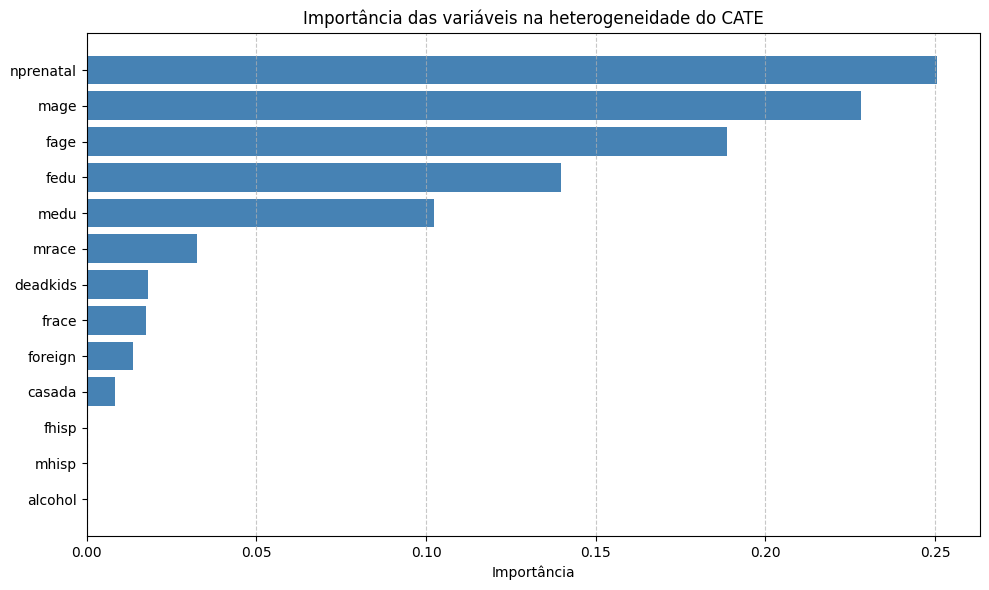

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obter importâncias e nomes das variáveis
importances = cf_dml.feature_importances_
features = np.array(X.columns)

# Ordenar do maior para o menor
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel('Importância')
plt.title('Importância das variáveis na heterogeneidade do CATE')
plt.gca().invert_yaxis()  # Coloca a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* o modelo mostra que a variável `nprenatal` contribui com 1/4 da explicação da heterogeneidade dos efeitos;
* Ou seja, ela é usada frequentemente nos splits das árvores da floresta causal para distinguir subgrupos com diferentes efeitos do tratamento.

Assim como fizemos anteriormente, podemos explorar o CATE definindo pontos X específicos, assim como fizemos com o LinearDML. E podemos aproveitar a não linearidade das florestas causais para verificar os efeitos nos diferentes níveis de uma covariável específica. Vejamos essa segunda possibilidade.

Vamos avaliar o efeito heterogêneodo fumo no peso dos bebês para diferentes **idades das gestantes** (a segunda variável mais importante para a composição do estimador).

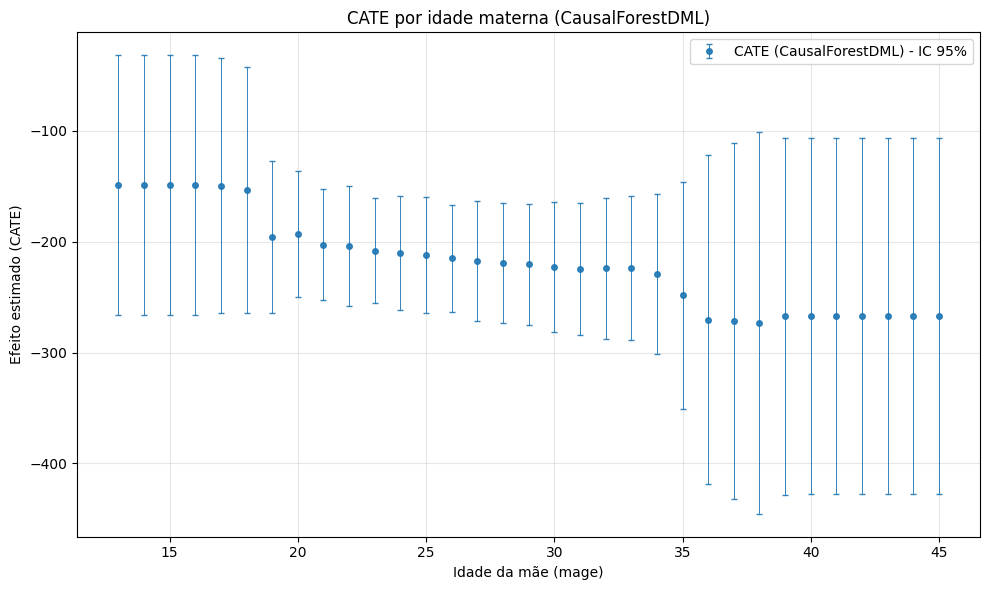

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Níveis de 'mage' e contagens
mage_levels = np.sort(df['mage'].dropna().unique())
mage_counts = df['mage'].value_counts().reindex(mage_levels, fill_value=0)

# 2) Perfil-base (médias) e grade variando apenas 'mage'
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base] * len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

# 3) CATE e IC 95% com CausalForestDML
cate_vals = cf_dml.effect(X_grid)
ci_low, ci_high = cf_dml.effect_interval(X_grid, alpha=0.05)

# 4) DataFrame de resultados
res_cf = pd.DataFrame({
    'mage': mage_levels,
    'cate': cate_vals,
    'ci_low': ci_low,
    'ci_high': ci_high,
    'n_obs': mage_counts.values
}).sort_values('mage').reset_index(drop=True)

# 5) Gráfico: pontos + barras de erro (IC 95%)
plt.figure(figsize=(10, 6))
plt.errorbar(
    res_cf['mage'], res_cf['cate'],
    yerr=[res_cf['cate'] - res_cf['ci_low'], res_cf['ci_high'] - res_cf['cate']],
    fmt='o', capsize=2, elinewidth=0.7, markersize=4, alpha=0.9,
    label='CATE (CausalForestDML) - IC 95%'
)
plt.xlabel('Idade da mãe (mage)')
plt.ylabel('Efeito estimado (CATE)')
plt.title('CATE por idade materna (CausalForestDML)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### Orthogonal Forest

**Causal Forest: *residualização implícita***

O **Causal Forest (CF)**, de Wager & Athey (2018), segue a ideia de que **as árvores aprendem as regiões onde o efeito do tratamento varia**.

Dentro de cada folha, ele estima um **efeito causal local** com base em uma regressão simples entre o resultado $Y$ e o tratamento $D$, *condicional às covariáveis $X$* que definem a folha:

$$
\hat{\tau}*{\text{leaf}} =
\frac{\sum*{i \in \text{leaf}} (D_i - \bar{D}*{\text{leaf}})(Y_i - \bar{Y}*{\text{leaf}})}
{\sum_{i \in \text{leaf}} (D_i - \bar{D}_{\text{leaf}})^2}.
$$

Veja o que acontece aqui:

* Dentro da folha, o modelo já está implicitamente controlando por $X$ (pois as observações foram agrupadas com base em semelhanças em $X$);
* A regressão de $Y$ sobre $D$ **usa as variações de $Y$ e $D$ que restam depois de fixar $X$** (as folhas são regiões homogêneas em $X$);
* Ou seja, o Causal Forest *residualiza* $Y$ e $D$ **implicitamente**, por meio da própria partição da floresta.

**Intuição:**
O CF não cria variáveis residuais de $Y$ e $D$ antes da estimação.
Ele “confia” que as divisões das árvores já removeram a dependência de $X$ — e estima o efeito causal *diretamente dentro de cada folha*.

Por isso dizemos que ele **residualiza dentro das folhas** (implícito). É como se ele dissesse:

> “Eu não vou remover $X$ de $Y$ e $D$ antes.
> Vou agrupar observações com $X$ parecidos e deixar as árvores fazerem esse controle.”


***Orthogonal Forest - residualização explícita***

O **Orthogonal Forest (OF)**, de Oprescu et al. (2019), segue um princípio diferente: ele aplica a **orthogonalização do Double Machine Learning (DML)** *antes* de estimar o efeito heterogêneo.

Primeiro, ele **remove o efeito de $X$** sobre $Y$ e $D$ com regressões auxiliares (qualquer modelo de ML):

$$
\hat{\mu}(d, X) \approx E[Y|D=d, X],
\quad
\hat{e}(X) \approx E[D|X].
$$

Depois, constrói explicitamente os **resíduos**:

$$
\tilde{Y}_i = Y_i - \hat{\mu}(D_i, X_i),
\quad
\tilde{D}_i = D_i - \hat{e}(X_i).
$$

Esses resíduos são usados para estimar o efeito causal local:

$$
\hat{\tau}(x)
= \frac{\sum_i \alpha_i(x)\tilde{D}_i \tilde{Y}_i}
{\sum_i \alpha_i(x)\tilde{D}_i^2}.
$$

Aqui, a floresta atua **sobre variáveis já “limpas” de $X$** — ou seja, o controle por covariáveis é feito **antes** da etapa de árvores.

**Intuição:** O OF diz:

> “Antes de estimar o efeito de $D$ em $Y$,
> vou remover toda a influência de $X$ em ambos.
> Depois, vou deixar a floresta aprender a relação entre as partes que sobraram.”

* **Quando os resultados são (quase) idênticos**

Os dois métodos tendem a produzir resultados muito próximos quando:

* As relações de $Y$ e $D$ com $X$ são aproximadamente lineares ou simples, de modo que a “residualização implícita” do Causal Forest já remove bem o viés.
* O tamanho amostral é grande e as árvores conseguem formar folhas homogêneas o suficiente, ou seja, cada folha representa bem a dependência entre $Y$, $D$ e $X$.
* O modelo de propensão ($e(X)$) e o modelo de resultado ($m(D,X)$) são bem ajustados (mesmo que implícitos no CF). Nesse caso, o Orthogonal Forest não ganha muita vantagem, porque o CF já está, na prática, orthogonalizando “por partição”.

Se as partições das árvores do CF capturam bem a estrutura de $X$, então residualizar explicitamente (como no OF) muda pouco — ambos acabam estimando praticamente o mesmo $\tilde{Y}$ e $\tilde{D}$ dentro de cada folha.

* **Quando os resultados podem divergir bastante**

O Orthogonal Forest tende a se destacar (ou dar resultados diferentes) quando há forte confusão ou relações não lineares complexas entre $X$, $Y$ e $D$.

* Quando $D$ é fortemente previsível a partir de $X$ (alto $R^2$ da propensão): O CF pode sofrer com confounding bias porque não “limpa” o efeito de $X$ antes da estimação.
* Quando $Y$ depende de $X$ de forma altamente não linear: O CF pode capturar parte da variação de $Y$ que não é devida ao tratamento, distorcendo $\tau(X)$.
* Quando há colinearidade entre as covariáveis e o tratamento: O CF não remove explicitamente essas dependências; o OF faz isso pela residualização.
* Quando a amostra é pequena: O CF pode superestimar efeitos locais (overfitting de folhas), enquanto o OF tende a ser mais estável, já que trabalha sobre resíduos mais “neutros”.



O Orthogonal Forest é o Causal Forest com o pré-processamento ortogonal do Double Machine Learning (DML).
* O Orthogonal Forest não implementa o conceito de “florestas honestas” no mesmo sentido de Wager & Athey (2018). Ele adota outra forma de honestidade — via cross-fitting — que garante ortogonalidade, mas não faz a separação explícita de amostras entre “split” e “estimation” dentro de cada árvore como o Causal Forest faz.

---

**Exemplos adicionais**

In [1]:
import numpy as np
from econml.iv.dml import DMLIV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Simulação simples de dados
np.random.seed(123)
n = 1000
p = 5
X = np.random.normal(size=(n, p))
Z = np.random.binomial(1, 0.5, size=(n,))
# tratamento T depende de Z e de X
T = 0.8 * Z + 0.3 * X[:,0] + np.random.normal(size=n)
# efeito heterogêneo verdadeiro: função de X
def true_theta(x):
    return 5 * x[:,0]
Y = true_theta(X) * T + 2 * X[:,1] + np.random.normal(size=n)

# Definir estimador
est = DMLIV(
    model_y_xw = RandomForestRegressor(n_estimators=100),
    model_t_xw = RandomForestRegressor(n_estimators=100),
    model_t_xwz = RandomForestRegressor(n_estimators=100),
    model_final = LinearRegression(fit_intercept=True),
    discrete_treatment=False,
    discrete_instrument=False,
    cv = 3,
    random_state = 123
)

# Ajustar o estimador
est.fit(Y=Y, T=T, Z=Z, X=X)

# Estimar o efeito condicional para alguns X’s
X_new = X[:5]
theta_hat = est.effect(X_new)
print("Estimativas de θ(X):", theta_hat)

# Ver coeficientes se modelo_final for linear
print("Coeficientes da heterogeneidade:", est.coef_)
print("Intercepto:", est.intercept_)


c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Estimativas de θ(X): [-2.04725065  4.94299838 -1.49050467 -0.80136703  3.49876143]
Coeficientes da heterogeneidade: [ 3.44297704  0.38676396  0.01037851 -0.43862897 -0.39650234]
Intercepto: 0.41175556224900134


c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\econml\dml\dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
  warn("The final model has a nonzero intercept for at least one outcome; "


---

#### Considerações Finais

Vimos os modelos de DML: PLR, PLIV, IRM e IIVM, e como aplicá-los na prática com o pacote EconML. Além disso, exploramos o fundamento unificador dos estimadores modernos de inferência causal por meio da Efficient Influence Function (EIF) e sua importância para garantir robustez e eficiência. Por fim, discutimos o Causal Forest e o Orthogonal Forest como extensões não paramétricas do DML para capturar heterogeneidades complexas nos efeitos causais.

Em resumo, os modelos de DML decorrentes de Chernozhukov et al (2018), juntamente com o Causal Forest e o Orthogonal Forest, fornecem ferramentas poderosas para estimar efeitos causais heterogêneos em contextos complexos. Utilizamos a ideia de Chernozhukov et al quando queremos estimar o CATE assumindo uma relação linear entre o efeito do tratamento e as covariáveis. Já o Causal Forest e o Orthogonal Forest permitem relaxar essa suposição, capturando relações não lineares e interativas de forma mais flexível.